<a href="https://colab.research.google.com/github/Rehabah/sent_class/blob/main/Final_Sentimenet_Analysis_and_Text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text Preprocessing

Libraries Installation and Importing

In [ ]:
pip install pyarabic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 126 kB 5.4 MB/s 


In [ ]:
pip install stop-words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32911 sha256=3ee5ba428cd824d410ed5c2bbd44eaabbbfc3864403f14c5b578355ac1325f4f
  Stored in directory: /root/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words


In [ ]:
pip install arabic-reshaper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install python-bidi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 175 kB 5.1 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=1914a6853fa7b28d398b1d35c5d590264289078357ca8192a4475bf0eec07527
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [ ]:
import pandas as pd
import pyarabic.araby as araby
from google.colab import files
import io
import re
from string import punctuation
import nltk
from nltk.corpus import stopwords
from stop_words import get_stop_words
import unicodedata
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display
import numpy as np
import emoji
from wordcloud import WordCloud
import plotly
import plotly.offline as py
import plotly.graph_objs as go
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.decomposition import LatentDirichletAllocation


Reading Text File

In [ ]:
#  from google.colab import drive
#  drive.mount("/content/drive", force_remount=True)
uploaded=files.upload()

Saving balanced-reviews.txt to balanced-reviews.txt


In [ ]:
print(uploaded)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
column1=[]
column2=[]
column3=[]
column4=[]
column5=[]
coloumn_last = [] 
with open('balanced-reviews.txt', "r+",encoding='utf-16',errors='ignore') as f:
    data = f.readlines() 
    #print (data) 
    for line in data: 
        column1.append(line.strip().split("\t")[1])
        column2.append(line.strip().split("\t")[2]) 
        column3.append(line.strip().split("\t")[3]) 
        column4.append(line.strip().split("\t")[4]) 
        column5.append(line.strip().split("\t")[5]) 
        coloumn_last.append(line.strip().split("\t")[-1]) 

In [ ]:
df = pd.DataFrame(list(zip(column1,column2,column3,column4,column5,coloumn_last)),
                columns = ['name','rating','type','type2','duration','text'])

In [ ]:
len(df)

105699

In [ ]:
df.head()

,name,rating,type,type2,duration,text
0,Hotel name,rating,user type,room type,nights,review
1,فندق 72,2,مسافر منفرد,غرفة ديلوكس مزدوجة أو توأم,أقمت ليلة واحدة,“ممتاز”. النظافة والطاقم متعاون.
2,فندق 72,5,زوج,غرفة ديلوكس مزدوجة أو توأم,أقمت ليلة واحدة,استثنائي. سهولة إنهاء المعاملة في الاستقبال. ل...
3,فندق 72,5,زوج,-,أقمت ليلتين,استثنائي. انصح بأختيار الاسويت و بالاخص غرفه ر...
4,فندق 72,1,زوج,غرفة قياسية مزدوجة,أقمت ليلة واحدة,“استغرب تقييم الفندق كخمس نجوم”. لا شي. يستحق ...


In [ ]:
#Removing Headers
df1 = df.iloc[1: , :]
df1.head()

,name,rating,type,type2,duration,text
1,فندق 72,2,مسافر منفرد,غرفة ديلوكس مزدوجة أو توأم,أقمت ليلة واحدة,“ممتاز”. النظافة والطاقم متعاون.
2,فندق 72,5,زوج,غرفة ديلوكس مزدوجة أو توأم,أقمت ليلة واحدة,استثنائي. سهولة إنهاء المعاملة في الاستقبال. ل...
3,فندق 72,5,زوج,-,أقمت ليلتين,استثنائي. انصح بأختيار الاسويت و بالاخص غرفه ر...
4,فندق 72,1,زوج,غرفة قياسية مزدوجة,أقمت ليلة واحدة,“استغرب تقييم الفندق كخمس نجوم”. لا شي. يستحق ...
5,فندق 72,4,زوج,غرفة ديلوكس مزدوجة أو توأم,أقمت ليلتين,جيد. المكان جميل وهاديء. كل شي جيد ونظيف بس كا...


In [ ]:
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.float_format', lambda x: '%0f' % x)
pd.set_option('display.max_colwidth', None)

Reading data from Github

In [ ]:
import pandas as pd
url ='https://github.com/hadyelsahar/large-arabic-sentiment-analysis-resouces/blob/master/datasets/HTL.csv?raw=true'
df_u = pd.read_csv(url, encoding='utf-8')#,sep=";",header=None)
df_u.head()

,text,polarity
0,"المكان الذي يمكنك فيه مراجعة الذات والتفكر هو كوكروبيت، غانا.... \r\nثمة الكثير عند زيارة غانا. وعلى الرغم من الفقر الذي سوف تلاحظه على طريقك إلى بيغ ميلي باكيارد، وجدت أن الناس في غانا يملكون ثراء القلب حتى رغم العوز. بيغ ميلي باكيارد هو مكان يمكنني فيه مراجعة الذات والتفكر . التقيت أشخاصاً كانوا يعملون على مبادرات مختلفة. بيغ ميلي هو مكان يمكننا فيه تبادل الملاحظات والآراء. بيغ ميلي مليء بالسلام وهادئ للغاية . الطعام ممتاز جداً! الطهاة ممتازون! وبالإضافة إلى ذلك, لا بد من الإشارة إلى أن العمال الذين لا يكلون، ويحرصون على سعادة نزلائهم هم من يجعلون المكان مضيافاً. هناك خيبة أمل واحدة كبيرة!! رغم أن الفنون والأشغال اليدوية يمكن شراؤها في الموقع إلا أن الأسعار غالية!!! مؤخراً أزالت السلطات في كوكروبيت محلات التجار الواقعة خارج شاطئ بيغ ميلي. كانت منتجات التجار أرخص! لا يزال هناك محل تجاري ""متجر مايسترو للفن الإفريقي في كوكروبيت"" يعرض الفنون والأشغال اليدوية الفريدة والملابس واللوحات. اشتريت لوحات مذهلة لايمكنك أن تجدها في بيغ ميلي. عندما تزور بيغ ميلي من فضلك خذ لحظة للذهاب إلى الشاطئ وعلى يمينك ستجد ""متجر مايسترو للفن الإفريقي"" المذهل. لا تنخدع بأسعار التجار في بيغ ميلي باكيارد. استمتع بالموسيقى والناس! الرجاء أن تقضي وقتاً ممتعاً.",1
1,موقع رائع وحديقة رائعة ويستحق نجمةّ إضافية \r\nعلى الرغم من أن الغرف ليست فاخرة، فهي نظيفة جداً وتعمل بشكل مثالي. بالتأكيد هناك بعض التصرفات الفردية والجماعية، ولكن كان هناك تكييف هواء كبير وجيد ونوافذ مزدوجة جيدة مع شاشات. منطقة الحديقة تحتوى على 3 مطاعم بالإضافة إلى بار رياضي. تبلغ تكلفة الإنترنت اللاسلكي 1:50 دولار للساعة، ولا يوجد خصم على الفترات الأطول، لذلك اضطررت إلى إغلاق حاسوبي أكثر. إف و بي رخيص جداً. يبدو أن هناك العديد من الزوار الأجانب هناك. 85 دولار أمريكي لليلة بما في ذلك بوفيه إفطار بمستوى نجمة واحدة. إقامة أفضل بكثير مما اعتقدت، سنعود بالتأكيد. شملت الإقامات السابقة فندق الأفريقية ريجنت و الدخول بالمطار غرب فندق (خيارريجينت أفريكان وفندق إيربيورت ويست (خيار قوي لتلك المنطقة من المدينة). حركة المرور في أكرا مُصابة بالشلل، لذا قم بعقد اجتماعاتك في فندق بالوما - وهو معروف جيداً.,0
2,أسوأ فندق أقمت فيه على الإطلاق \r\nيستغرق تسجيل الوصول حوالي 30 دقيقة، باهظ الثمن، غرف قديمة جداً وقذرة، سجادة قذرة جداً... فى المجمل تجربة سيئة للغاية.\r\nمثل هذا الفندق سيكون في آسيا، نجمة واحدة، ويمكن أن أذهب في مايو.\r\n30 دولار أمريكي.\r\nالسعر في فندق نوفوتيل حوالي 250 دولار أمريكي\r\n,-1
3,بدون روح كأنه فندق ثلاثة نجوم \r\nبدون إدارة احترافية، فإن هذا الفندق يبدو كمركب ضائع في البحر.\r\nالغرف موزعة بطريقة عشوائية والإفطار هو نقانق باردة سخيفة ونفس السلطة القديمة في كل يوم.\r\nكان مكيف الهواء يثير الضوضاء في الغرفة ومن المستحيل إيقافه.\r\nولكن مركز صحي رائع\r\n,0
4,فندق جميل مع سوء الإدارة والخدمات. \r\nمن الخارج بدا مبشرًا، لكن خيبة الأمل بدأت في وقت الغداء، جودة الطعام سيئة سيئة سيئة، والحساء كان مزريًا جدًا، والفواكه جودتها سيئة (البكيخ كان متعفنًا، واو!). اشتكى زملائي من عدم وجود مناشف في غرفهم في حوالي الساعة 8 مساءً، والبعض لم تكن أسرّتهم مرتبة حتى الساعة 5 مساءً. تناولنا عشاء مكسيكيًا ومرة أخرى كانت قائمة الطعام مزرية. لن أقيم هنا أبدًا، على الأقل أتحدث عن نفسي!,-1


In [ ]:
df_u.columns

Index(['text', 'polarity'], dtype='object')

In [ ]:
len(df_u)

15572

Text Preprocessing

In [ ]:
def text_normalization(x):
    #x=x .str.strip()
    x=x.replace({' +':' '},regex=True)
    x = x.replace("  ",' ', regex=True)
    x=x.replace('ة','ه', regex=True)
    x=x.replace('أ','ا', regex=True)
    x=x.replace('إ','ا', regex=True)
    x = x.replace('\n&\n',' ', regex=True)
    x = x.replace('&',' ', regex=True)
    x = x.replace('\n',' ', regex=True)
    x = x.replace('/',' ', regex=True)
    x = x.replace('”',' ', regex=True)
    x = x.replace('“',' ', regex=True)
    x = x.replace('"',' ', regex=True)
    x = x.replace('!',' ', regex=True)
    x = x.replace('\r',' ', regex=True)
    x=x.replace(r'[\(\)\d]', ' ',regex=True)
    return x

def normalizeArabic(text):
    noise = re.compile(""" ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
    text = re.sub(noise, '', text)
    text = re.sub(r'(.)\1+', r"\1\1", text) # Remove longation
    return araby.strip_tashkeel(text)
 

In [ ]:
df1['text1']=text_normalization(df['text'])
df1['text2']=df1['text1'].apply(normalizeArabic)

df_u['text1']=text_normalization(df_u['text'])
df_u['text2']=df_u['text1'].apply(normalizeArabic)



In [ ]:
df1['text1'][140]#.unique()

'ضعيف. شبكه الواي فاي فقط لاغير. الافطار لم يرتقي لمستوى المقبول.الحمام سئ جدا جدا وصغير الحجم .عدم الراحه بالنوم بسبب سماع الشارع من الخارج و ذلك يعود لعدم اغلاق الشبابيك باحكام.'

In [ ]:
df_u['text2'].to_frame()

,text1
0,"المكان الذي يمكنك فيه مراجعه الذات والتفكر هو كوكروبيت، غانا.... ثمه الكثير عند زياره غانا. وعلى الرغم من الفقر الذي سوف تلاحظه على طريقك الى بيغ ميلي باكيارد، وجدت ان الناس في غانا يملكون ثراء القلب حتى رغم العوز. بيغ ميلي باكيارد هو مكان يمكنني فيه مراجعه الذات والتفكر . التقيت اشخاصاً كانوا يعملون على مبادرات مختلفه. بيغ ميلي هو مكان يمكننا فيه تبادل الملاحظات والآراء. بيغ ميلي مليء بالسلام وهادئ للغايه . الطعام ممتاز جداً الطهاه ممتازون وبالاضافه الى ذلك, لا بد من الاشاره الى ان العمال الذين لا يكلون، ويحرصون على سعاده نزلائهم هم من يجعلون المكان مضيافاً. هناك خيبه امل واحده كبيره رغم ان الفنون والاشغال اليدويه يمكن شراؤها في الموقع الا ان الاسعار غاليه مؤخراً ازالت السلطات في كوكروبيت محلات التجار الواقعه خارج شاطئ بيغ ميلي. كانت منتجات التجار ارخص لا يزال هناك محل تجاري متجر مايسترو للفن الافريقي في كوكروبيت يعرض الفنون والاشغال اليدويه الفريده والملابس واللوحات. اشتريت لوحات مذهله لايمكنك ان تجدها في بيغ ميلي. عندما تزور بيغ ميلي من فضلك خذ لحظه للذهاب الى الشاطئ وعلى يمينك ستجد متجر مايسترو للفن الافريقي المذهل. لا تنخدع باسعار التجار في بيغ ميلي باكيارد. استمتع بالموسيقى والناس الرجاء ان تقضي وقتاً ممتعاً."
1,موقع رائع وحديقه رائعه ويستحق نجمهّ اضافيه على الرغم من ان الغرف ليست فاخره، فهي نظيفه جداً وتعمل بشكل مثالي. بالتاكيد هناك بعض التصرفات الفرديه والجماعيه، ولكن كان هناك تكييف هواء كبير وجيد ونوافذ مزدوجه جيده مع شاشات. منطقه الحديقه تحتوى على 3 مطاعم بالاضافه الى بار رياضي. تبلغ تكلفه الانترنت اللاسلكي 1:50 دولار للساعه، ولا يوجد خصم على الفترات الاطول، لذلك اضطررت الى اغلاق حاسوبي اكثر. اف و بي رخيص جداً. يبدو ان هناك العديد من الزوار الاجانب هناك. 85 دولار امريكي لليله بما في ذلك بوفيه افطار بمستوى نجمه واحده. اقامه افضل بكثير مما اعتقدت، سنعود بالتاكيد. شملت الاقامات السابقه فندق الافريقيه ريجنت و الدخول بالمطار غرب فندق (خيارريجينت افريكان وفندق ايربيورت ويست (خيار قوي لتلك المنطقه من المدينه). حركه المرور في اكرا مُصابه بالشلل، لذا قم بعقد اجتماعاتك في فندق بالوما - وهو معروف جيداً.
2,اسوا فندق اقمت فيه على الاطلاق يستغرق تسجيل الوصول حوالي 30 دقيقه، باهظ الثمن، غرف قديمه جداً وقذره، سجاده قذره جداً... فى المجمل تجربه سيئه للغايه. مثل هذا الفندق سيكون في آسيا، نجمه واحده، ويمكن ان اذهب في مايو. 30 دولار امريكي. السعر في فندق نوفوتيل حوالي 250 دولار امريكي
3,بدون روح كانه فندق ثلاثه نجوم بدون اداره احترافيه، فان هذا الفندق يبدو كمركب ضائع في البحر. الغرف موزعه بطريقه عشوائيه والافطار هو نقانق بارده سخيفه ونفس السلطه القديمه في كل يوم. كان مكيف الهواء يثير الضوضاء في الغرفه ومن المستحيل ايقافه. ولكن مركز صحي رائع
4,فندق جميل مع سوء الاداره والخدمات. من الخارج بدا مبشرًا، لكن خيبه الامل بدات في وقت الغداء، جوده الطعام سيئه سيئه سيئه، والحساء كان مزريًا جدًا، والفواكه جودتها سيئه (البكيخ كان متعفنًا، واو ). اشتكى زملائي من عدم وجود مناشف في غرفهم في حوالي الساعه 8 مساءً، والبعض لم تكن اسرّتهم مرتبه حتى الساعه 5 مساءً. تناولنا عشاء مكسيكيًا ومره اخرى كانت قائمه الطعام مزريه. لن اقيم هنا ابدًا، على الاقل اتحدث عن نفسي
...,...
15567,قريب من كل شي جميل وهادي وكل شي حولك حتي المواقف هادي يصلح لزوجين لشهر العسل ابسالا مدينه حالمه طبيعه وهدوء انصح بالزياره والتمتع بجو المدينه تاريخ الفندق موقعه جداً ممتاز بقرب محطه القطار ورحابه الموظفين به جداً راقيه خدمه سريعه نظافته وتوفر
15568,فندق رائع وممتاز لقد نزلت بتاريخ 1 12 2013 في هذا الفندق وبقيت فيه بحدود 10 ايام وشهادت كل ما هو جيد من الراحه والخدمه شكرا لكم على كل ما قدمتموه وكم اتمنى ان اعود وانزل في هذا الفندق لانه يقع في قلب المدينه وكل شي قريب منك
15569,جيد الفندق بشكل عام ميزته انه يقع قرب مركز شرطه العاصمه وعموما اوغندا بها امان وليس من الخطوره السفر الى هناك يتميز الفندق انه رخيص وفي نفس الوقت مستوى نظافته ممتاز وهذا هو اهم شيء في تلك البلاد المطعم في الفندق بالنسبه الى باقي المطاعم في المدينه هو متوسط ولكن بالمقارنه بفنادق مدن اخرى فهو ضعيف ايضا به خدمه مساج في الغرف تاتيك المدلكه جميله سمراء تقوم بتدليك جسمك بالطريقه التي تعجبك :)
15570,احقر مكان على وجه الارض انصح كل الذين يقومون بتصفح الفنادق عبر الانترنت بالتروى فى الاختيار فهذا المكان هو احقر ما وجدت فى المغرب فهو بعيد جدا عن مراكش وسط الزراعات والادغال ولاتوجد خدمه بالداخل ولا يوجد انترنت والتوا

In [ ]:
#df["Description_clean"] = df.Description.map(preprocess)

In [ ]:
df1['text12']=''
for i in range(len(df1)):
   print(i)
   #df['text1'].iloc[i]=text_normalization(df['text'].iloc[i])
   df1['text12'].iloc[i]=re.sub(r'[^\w.]', ' ', df1['text2'].iloc[i])
   df1['text12'].iloc[i]=re.sub(r'[^\w\s]', '', df1['text2'].iloc[i])
   df1['text12'].iloc[i]= re.sub(r'(.)\1+', r"\1\1", df1['text2'].iloc[i]) # Remove longation
   #df['text12'].iloc[i]= df['text1'].iloc[i].replace(r'[^\w\s]+', '')
   df1['text12'].iloc[i]=re.sub('\s+',' ',df1['text2'].iloc[i])
   df1['text12'].iloc[i]=re.sub(r"([\w/'+$\s-]+|[^\w/'+$\s-]+)\s*", r"\1 ", df1['text2'].iloc[i])
   df1['text12'].iloc[i]=araby.strip_diacritics(df1['text2'].iloc[i]) #remove tashkeel
   df1['text12'].iloc[i]=re.sub(f"[{re.escape(punctuation)}]", " ", df1['text2'].iloc[i])  # Remove punctuation

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
#f['text13']= re.sub(r'(.)\1+', r"\1\1", str(df['text12'])) # Remove longation

In [1]:
df_u['text12']=''
for i in range(len(df_u)):
   print(i)
   df_u['text12'].iloc[i]=re.sub(r'[^\w.]', ' ', df_u['text2'].iloc[i])
   df_u['text12'].iloc[i]=re.sub(r'[^\w\s]', '', df_u['text2'].iloc[i])
   df_u['text12'].iloc[i]= re.sub(r'(.)\1+', r"\1\1", df_u['text2'].iloc[i]) # Remove longation
   df_u['text12'].iloc[i]=re.sub('\s+',' ',df_u['text2'].iloc[i])
   df_u['text12'].iloc[i]=re.sub(r"([\w/'+$\s-]+|[^\w/'+$\s-]+)\s*", r"\1 ", df_u['text2'].iloc[i])
   df_u['text12'].iloc[i]=araby.strip_diacritics(df_u['text2'].iloc[i])
   df_u['text12'].iloc[i]=re.sub(f"[{re.escape(punctuation)}]", " ", df_u['text2'].iloc[i])  # Remove punctuation

In [ ]:
df1['text12'].to_frame()

,text12
1,ممتاز النظافه والطاقم متعاون
2,استثنائي سهوله انهاء المعامله في الاستقبال لاشيئ
3,استثنائي انصح باختيار الاسويت و بالاخص غرفه رقم 801 نوعيه الارضيه
4,استغرب تقييم الفندق كخمس نجوم لا شي يستحق 2 نجمه
5,جيد المكان جميل وهاديء كل شي جيد ونظيف بس كان حوض السباحه لايعمل في هذي الفتره حسب كلامهم يقولوا فيه صيانه والله اعلم
...,...
105694,فند لا شئ عجبني طقم العمل سيئ جدالا يوجد بالفندق اي خدمات الحمامات و الغرفه غير نظيفه بالمره و رائحه كريهه و يوجد حشرات بالحمام
105695,سيئ قربه من المسجد النبوي الشريف استخدام موظف الاستقبال للمواقف المخصصه للعملاء وحجز سياراتهم بسيارته دون مراعاه لاي طارئ او مسؤوليه
105696,اسوا اقامه في الرحله القرب من الحرم كل شيء ازعاج عدم تجاوب الاستقبال الاثاث قديم ليست نظيفه زحام شديد جدا على المصاعد باب الغرفه يفتح بصعوبه تاخر في اجراءات الدخول غرفه كانت غير نظيفه والجيران ازعاجهم شديدطلبت تغييرها غيروها بغرفه بينها وبين الغرفه المجاوره باب فيه فتحه لايمكن الاطمئنان بسببها يمكن من خلالها رؤيه من يمر الى دوره المياه باختصار ندمت اني سكنت فيها ولن اكررها باذن الله
105697,دون المستوى قربه من الحرم كل شيء


In [ ]:
df_u['text12'].to_frame()

,text12
0,المكان الذي يمكنك فيه مراجعه الذات والتفكر هو كوكروبيت، غانا ثمه الكثير عند زياره غانا وعلى الرغم من الفقر الذي سوف تلاحظه على طريقك الى بيغ ميلي باكيارد، وجدت ان الناس في غانا يملكون ثراء القلب حتى رغم العوز بيغ ميلي باكيارد هو مكان يمكنني فيه مراجعه الذات والتفكر التقيت اشخاصاً كانوا يعملون على مبادرات مختلفه بيغ ميلي هو مكان يمكننا فيه تبادل الملاحظات والآراء بيغ ميلي مليء بالسلام وهادئ للغايه الطعام ممتاز جداً الطهاه ممتازون وبالاضافه الى ذلك لا بد من الاشاره الى ان العمال الذين لا يكلون، ويحرصون على سعاده نزلائهم هم من يجعلون المكان مضيافاً هناك خيبه امل واحده كبيره رغم ان الفنون والاشغال اليدويه يمكن شراؤها في الموقع الا ان الاسعار غاليه مؤخراً ازالت السلطات في كوكروبيت محلات التجار الواقعه خارج شاطئ بيغ ميلي كانت منتجات التجار ارخص لا يزال هناك محل تجاري متجر مايسترو للفن الافريقي في كوكروبيت يعرض الفنون والاشغال اليدويه الفريده والملابس واللوحات اشتريت لوحات مذهله لايمكنك ان تجدها في بيغ ميلي عندما تزور بيغ ميلي من فضلك خذ لحظه للذهاب الى الشاطئ وعلى يمينك ستجد متجر مايسترو للفن الافريقي المذهل لا تنخدع باسعار التجار في بيغ ميلي باكيارد استمتع بالموسيقى والناس الرجاء ان تقضي وقتاً ممتعاً
1,موقع رائع وحديقه رائعه ويستحق نجمهّ اضافيه على الرغم من ان الغرف ليست فاخره، فهي نظيفه جداً وتعمل بشكل مثالي بالتاكيد هناك بعض التصرفات الفرديه والجماعيه، ولكن كان هناك تكييف هواء كبير وجيد ونوافذ مزدوجه جيده مع شاشات منطقه الحديقه تحتوى على 3 مطاعم بالاضافه الى بار رياضي تبلغ تكلفه الانترنت اللاسلكي 1 50 دولار للساعه، ولا يوجد خصم على الفترات الاطول، لذلك اضطررت الى اغلاق حاسوبي اكثر اف و بي رخيص جداً يبدو ان هناك العديد من الزوار الاجانب هناك 85 دولار امريكي لليله بما في ذلك بوفيه افطار بمستوى نجمه واحده اقامه افضل بكثير مما اعتقدت، سنعود بالتاكيد شملت الاقامات السابقه فندق الافريقيه ريجنت و الدخول بالمطار غرب فندق خيارريجينت افريكان وفندق ايربيورت ويست خيار قوي لتلك المنطقه من المدينه حركه المرور في اكرا مُصابه بالشلل، لذا قم بعقد اجتماعاتك في فندق بالوما وهو معروف جيداً
2,اسوا فندق اقمت فيه على الاطلاق يستغرق تسجيل الوصول حوالي 30 دقيقه، باهظ الثمن، غرف قديمه جداً وقذره، سجاده قذره جداً فى المجمل تجربه سيئه للغايه مثل هذا الفندق سيكون في آسيا، نجمه واحده، ويمكن ان اذهب في مايو 30 دولار امريكي السعر في فندق نوفوتيل حوالي 250 دولار امريكي
3,بدون روح كانه فندق ثلاثه نجوم بدون اداره احترافيه، فان هذا الفندق يبدو كمركب ضائع في البحر الغرف موزعه بطريقه عشوائيه والافطار هو نقانق بارده سخيفه ونفس السلطه القديمه في كل يوم كان مكيف الهواء يثير الضوضاء في الغرفه ومن المستحيل ايقافه ولكن مركز صحي رائع
4,فندق جميل مع سوء الاداره والخدمات من الخارج بدا مبشرًا، لكن خيبه الامل بدات في وقت الغداء، جوده الطعام سيئه سيئه سيئه، والحساء كان مزريًا جدًا، والفواكه جودتها سيئه البكيخ كان متعفنًا، واو اشتكى زملائي من عدم وجود مناشف في غرفهم في حوالي الساعه 8 مساءً، والبعض لم تكن اسرّتهم مرتبه حتى الساعه 5 مساءً تناولنا عشاء مكسيكيًا ومره اخرى كانت قائمه الطعام مزريه لن اقيم هنا ابدًا، على الاقل اتحدث عن نفسي
...,...
15567,قريب من كل شي جميل وهادي وكل شي حولك حتي المواقف هادي يصلح لزوجين لشهر العسل ابسالا مدينه حالمه طبيعه وهدوء انصح بالزياره والتمتع بجو المدينه تاريخ الفندق موقعه جداً ممتاز بقرب محطه القطار ورحابه الموظفين به جداً راقيه خدمه سريعه نظافته وتوفر
15568,فندق رائع وممتاز لقد نزلت بتاريخ 1 12 2013 في هذا الفندق وبقيت فيه بحدود 10 ايام وشهادت كل ما هو جيد من الراحه والخدمه شكرا لكم على كل ما قدمتموه وكم اتمنى ان اعود وانزل في هذا الفندق لانه يقع في قلب المدينه وكل شي قريب منك
15569,جيد الفندق بشكل عام ميزته انه يقع قرب مركز شرطه العاصمه وعموما اوغندا بها امان وليس من الخطوره السفر الى هناك يتميز الفندق انه رخيص وفي نفس الوقت مستوى نظافته ممتاز وهذا هو اهم شيء في تلك البلاد المطعم في الفندق بالنسبه الى باقي المطاعم في المدينه هو متوسط ولكن بالمقارنه بفنادق مدن اخرى فهو ضعيف ايضا به خدمه مساج في الغرف تاتيك المدلكه جميله سمراء تقوم بتدليك جسمك بالطريقه التي تعجبك
15570,احقر مكان على وجه الارض انصح كل الذين يقومون بتصفح الفنادق عبر الانترنت بالتروى فى الاختيار فهذا المكان هو احقر ما وجدت فى المغرب فهو بعيد جدا عن مراكش وسط الزراعات والادغال ولاتوجد خدمه بالداخل ولا يوجد انترنت والتواليتات الخاصه بالغرف لا تعمل بشكل سليم ومسدوده والافطار 

In [ ]:
len(df1['text12'])

105698

In [ ]:
len(df1['text12'].drop_duplicates())

103959

In [ ]:
df_f=pd.DataFrame(df1['text12'].drop_duplicates())

In [ ]:
df_f.to_frame()
#df_f.columns

Index(['text12'], dtype='object')

In [ ]:
print(len(df_u['text12'].drop_duplicates()))
print(len(df_u['text12']))

15572
15572


Removing Stop Words

In [ ]:
nltk.download('stopwords')
stops = set(stopwords.words("arabic"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df_f['text13']=df_f['text12'].apply(lambda x: ' '.join([word for word in x.split() if word not in get_stop_words('arabic')]))
df_u['text13']=df_u['text12'].apply(lambda x: ' '.join([word for word in x.split() if word not in get_stop_words('arabic')]))

In [ ]:
df_u['text13'].to_frame()

,text13
0,المكان يمكنك مراجعه الذات والتفكر كوكروبيت، غانا ثمه الكثير زياره غانا وعلى الرغم الفقر سوف تلاحظه طريقك بيغ ميلي باكيارد، وجدت الناس غانا يملكون ثراء القلب رغم العوز بيغ ميلي باكيارد مكان يمكنني مراجعه الذات والتفكر التقيت اشخاصاً كانوا يعملون مبادرات مختلفه بيغ ميلي مكان يمكننا تبادل الملاحظات والآراء بيغ ميلي مليء بالسلام وهادئ للغايه الطعام ممتاز جداً الطهاه ممتازون وبالاضافه بد الاشاره العمال يكلون، ويحرصون سعاده نزلائهم هم يجعلون المكان مضيافاً خيبه امل واحده كبيره رغم الفنون والاشغال اليدويه شراؤها الموقع الاسعار غاليه مؤخراً ازالت السلطات كوكروبيت محلات التجار الواقعه خارج شاطئ بيغ ميلي منتجات التجار ارخص يزال محل تجاري متجر مايسترو للفن الافريقي كوكروبيت يعرض الفنون والاشغال اليدويه الفريده والملابس واللوحات اشتريت لوحات مذهله لايمكنك تجدها بيغ ميلي تزور بيغ ميلي فضلك خذ لحظه للذهاب الشاطئ وعلى يمينك ستجد متجر مايسترو للفن الافريقي المذهل تنخدع باسعار التجار بيغ ميلي باكيارد استمتع بالموسيقى والناس الرجاء تقضي وقتاً ممتعاً
1,موقع رائع وحديقه رائعه ويستحق نجمهّ اضافيه الرغم الغرف ليست فاخره، فهي نظيفه جداً وتعمل مثالي بالتاكيد التصرفات الفرديه والجماعيه، ولكن تكييف هواء كبير وجيد ونوافذ مزدوجه جيده شاشات منطقه الحديقه تحتوى 3 مطاعم بالاضافه بار رياضي تبلغ تكلفه الانترنت اللاسلكي 1 50 دولار للساعه، يوجد خصم الفترات الاطول، لذلك اضطررت اغلاق حاسوبي بي رخيص جداً يبدو العديد الزوار الاجانب 85 دولار امريكي لليله بما بوفيه افطار بمستوى نجمه واحده اقامه افضل بكثير مما اعتقدت، سنعود بالتاكيد شملت الاقامات السابقه فندق الافريقيه ريجنت الدخول بالمطار غرب فندق خيارريجينت افريكان وفندق ايربيورت ويست خيار قوي لتلك المنطقه المدينه حركه المرور اكرا مُصابه بالشلل، لذا قم بعقد اجتماعاتك فندق بالوما معروف جيداً
2,اسوا فندق اقمت الاطلاق يستغرق تسجيل الوصول حوالي 30 دقيقه، باهظ الثمن، غرف قديمه جداً وقذره، سجاده قذره جداً المجمل تجربه سيئه للغايه مثل الفندق سيكون آسيا، نجمه واحده، ويمكن اذهب 30 دولار امريكي السعر فندق نوفوتيل حوالي 250 دولار امريكي
3,بدون روح كانه فندق ثلاثه نجوم بدون اداره احترافيه، الفندق يبدو كمركب ضائع البحر الغرف موزعه بطريقه عشوائيه والافطار نقانق بارده سخيفه ونفس السلطه القديمه مكيف الهواء يثير الضوضاء الغرفه المستحيل ايقافه ولكن مركز صحي رائع
4,فندق جميل سوء الاداره والخدمات الخارج بدا مبشرًا، خيبه الامل بدات وقت الغداء، جوده الطعام سيئه سيئه سيئه، والحساء مزريًا جدًا، والفواكه جودتها سيئه البكيخ متعفنًا، واو اشتكى زملائي وجود مناشف غرفهم حوالي الساعه 8 مساءً، والبعض تكن اسرّتهم مرتبه الساعه 5 مساءً تناولنا عشاء مكسيكيًا ومره قائمه الطعام مزريه اقيم هنا ابدًا، الاقل اتحدث نفسي
...,...
15567,قريب شي جميل وهادي وكل شي حولك حتي المواقف هادي يصلح لزوجين لشهر العسل ابسالا مدينه حالمه طبيعه وهدوء انصح بالزياره والتمتع بجو المدينه تاريخ الفندق موقعه جداً ممتاز بقرب محطه القطار ورحابه الموظفين جداً راقيه خدمه سريعه نظافته وتوفر
15568,فندق رائع وممتاز لقد نزلت بتاريخ 1 12 2013 الفندق وبقيت بحدود 10 وشهادت جيد الراحه والخدمه شكرا لكم قدمتموه وكم اتمنى اعود وانزل الفندق لانه يقع قلب المدينه وكل شي قريب منك
15569,جيد الفندق ميزته يقع قرب مركز شرطه العاصمه وعموما اوغندا امان وليس الخطوره السفر يتميز الفندق رخيص نفس مستوى نظافته ممتاز وهذا اهم شيء تلك البلاد المطعم الفندق بالنسبه باقي المطاعم المدينه متوسط ولكن بالمقارنه بفنادق مدن فهو ضعيف خدمه مساج الغرف تاتيك المدلكه جميله سمراء تقوم بتدليك جسمك بالطريقه تعجبك
15570,احقر مكان وجه الارض انصح يقومون بتصفح الفنادق عبر الانترنت بالتروى الاختيار فهذا المكان احقر وجدت المغرب فهو بعيد جدا مراكش وسط الزراعات والادغال ولاتوجد خدمه بالداخل يوجد انترنت والتواليتات الخاصه بالغرف تعمل سليم ومسدوده والافطار عباره بيضه مسلوقه وقطعه الجبن قليل المربى والزبد البلدى والخبز الغداء والعشاء فالله بالسر عليم فلقد ندمنا فعلنا وايضا وجدنا التواليت مسدود وعندما طلبنا تغييره قالو لنا بانهم قامو بدفع مبلغ اصلاحه فهل نحن ملتزمون بتصليح التواليت ؟ناهيك المكان الموجود الفندق ليس فندق وانما قبر وسط الزراعات حياه بشر وهذا للامانه احببت انصح غيرى


In [ ]:
df_f['text13'][140]

'ضعيف شبكه الواي فاي فقط لاغير الافطار يرتقي لمستوى المقبول الحمام سئ جدا جدا وصغير الحجم الراحه بالنوم سماع الشارع الخارج يعود لعدم اغلاق الشبابيك باحكام'

In [ ]:
df_u['text13'][140]

'الموقع جميل جداً اعجبني الفندق التعامل الموظفين النزلاء والمكان مريح ونظيف'

In [ ]:
#removing Pancutauation
 
# Create a dictionary of punctuation characters
punctuation = dict.fromkeys(i for i in range(sys.maxunicode)
 if unicodedata.category(chr(i)).startswith('P'))
 
# For each string, remove any punctuation characters
df_u['text14']=[string.translate(punctuation) for string in df_u['text13']]
df_f['text14']=[string.translate(punctuation) for string in df_f['text13']]

In [ ]:
type(df_u['text14'])

pandas.core.series.Series

In [ ]:
df_u['text14']#.to_frame()

0        المكان يمكنك مراجعه الذات والتفكر كوكروبيت غانا ثمه الكثير زياره غانا وعلى الرغم الفقر سوف تلاحظه طريقك بيغ ميلي باكيارد وجدت الناس غانا يملكون ثراء القلب رغم العوز بيغ ميلي باكيارد مكان يمكنني مراجعه الذات والتفكر التقيت اشخاصاً كانوا يعملون مبادرات مختلفه بيغ ميلي مكان يمكننا تبادل الملاحظات والآراء بيغ ميلي مليء بالسلام وهادئ للغايه الطعام ممتاز جداً الطهاه ممتازون وبالاضافه بد الاشاره العمال يكلون ويحرصون سعاده نزلائهم هم يجعلون المكان مضيافاً خيبه امل واحده كبيره رغم الفنون والاشغال اليدويه شراؤها الموقع الاسعار غاليه مؤخراً ازالت السلطات كوكروبيت محلات التجار الواقعه خارج شاطئ بيغ ميلي منتجات التجار ارخص يزال محل تجاري متجر مايسترو للفن الافريقي كوكروبيت يعرض الفنون والاشغال اليدويه الفريده والملابس واللوحات اشتريت لوحات مذهله لايمكنك تجدها بيغ ميلي تزور بيغ ميلي فضلك خذ لحظه للذهاب الشاطئ وعلى يمينك ستجد متجر مايسترو للفن الافريقي المذهل تنخدع باسعار التجار بيغ ميلي باكيارد استمتع بالموسيقى والناس الرجاء تقضي وقتاً ممتعاً
1                                               

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Tokinization (ngrams)


In [ ]:
answer_df = df_f[df_f['text14'].notnull()]
answer_df['toks'] = answer_df.apply(lambda row: nltk.word_tokenize(row['text14']), axis=1)

In [ ]:
answer_df_u = df_u[df_u['text14'].notnull()]
answer_df_u['toks'] = answer_df_u.apply(lambda row: nltk.word_tokenize(row['text14']), axis=1)

In [ ]:
answer_df['toks'].to_frame()

,toks
1,"[ممتاز, النظافه, والطاقم, متعاون]"
2,"[استثنائي, سهوله, انهاء, المعامله, الاستقبال, لاشيئ]"
3,"[استثنائي, انصح, باختيار, الاسويت, بالاخص, غرفه, رقم, 801, نوعيه, الارضيه]"
4,"[استغرب, تقييم, الفندق, كخمس, نجوم, شي, يستحق, 2, نجمه]"
5,"[جيد, المكان, جميل, وهاديء, شي, جيد, ونظيف, بس, حوض, السباحه, لايعمل, هذي, الفتره, حسب, كلامهم, يقولوا, صيانه, والله, اعلم]"
...,...
105694,"[فند, شئ, عجبني, طقم, العمل, سيئ, جدالا, يوجد, بالفندق, خدمات, الحمامات, الغرفه, نظيفه, بالمره, رائحه, كريهه, يوجد, حشرات, بالحمام]"
105695,"[سيئ, قربه, المسجد, النبوي, الشريف, استخدام, موظف, الاستقبال, للمواقف, المخصصه, للعملاء, وحجز, سياراتهم, بسيارته, مراعاه, لاي, طارئ, مسؤوليه]"
105696,"[اسوا, اقامه, الرحله, القرب, الحرم, شيء, ازعاج, تجاوب, الاستقبال, الاثاث, قديم, ليست, نظيفه, زحام, شديد, جدا, المصاعد, باب, الغرفه, يفتح, بصعوبه, تاخر, اجراءات, الدخول, غرفه, نظيفه, والجيران, ازعاجهم, شديدطلبت, تغييرها, غيروها, بغرفه, بينها, وبين, الغرفه, المجاوره, باب, فتحه, لايمكن, الاطمئنان, بسببها, خلالها, رؤيه, يمر, دوره, المياه, باختصار, ندمت, اني, سكنت, ولن, اكررها, باذن, الله]"
105697,"[المستوى, قربه, الحرم, شيء]"


In [ ]:
answer_df_u['toks'].to_frame()

,toks
0,"[المكان, يمكنك, مراجعه, الذات, والتفكر, كوكروبيت, غانا, ثمه, الكثير, زياره, غانا, وعلى, الرغم, الفقر, سوف, تلاحظه, طريقك, بيغ, ميلي, باكيارد, وجدت, الناس, غانا, يملكون, ثراء, القلب, رغم, العوز, بيغ, ميلي, باكيارد, مكان, يمكنني, مراجعه, الذات, والتفكر, التقيت, اشخاصاً, كانوا, يعملون, مبادرات, مختلفه, بيغ, ميلي, مكان, يمكننا, تبادل, الملاحظات, والآراء, بيغ, ميلي, مليء, بالسلام, وهادئ, للغايه, الطعام, ممتاز, جداً, الطهاه, ممتازون, وبالاضافه, بد, الاشاره, العمال, يكلون, ويحرصون, سعاده, نزلائهم, هم, يجعلون, المكان, مضيافاً, خيبه, امل, واحده, كبيره, رغم, الفنون, والاشغال, اليدويه, شراؤها, الموقع, الاسعار, غاليه, مؤخراً, ازالت, السلطات, كوكروبيت, محلات, التجار, الواقعه, خارج, شاطئ, بيغ, ميلي, منتجات, التجار, ارخص, يزال, محل, ...]"
1,"[موقع, رائع, وحديقه, رائعه, ويستحق, نجمهّ, اضافيه, الرغم, الغرف, ليست, فاخره, فهي, نظيفه, جداً, وتعمل, مثالي, بالتاكيد, التصرفات, الفرديه, والجماعيه, ولكن, تكييف, هواء, كبير, وجيد, ونوافذ, مزدوجه, جيده, شاشات, منطقه, الحديقه, تحتوى, 3, مطاعم, بالاضافه, بار, رياضي, تبلغ, تكلفه, الانترنت, اللاسلكي, 1, 50, دولار, للساعه, يوجد, خصم, الفترات, الاطول, لذلك, اضطررت, اغلاق, حاسوبي, بي, رخيص, جداً, يبدو, العديد, الزوار, الاجانب, 85, دولار, امريكي, لليله, بما, بوفيه, افطار, بمستوى, نجمه, واحده, اقامه, افضل, بكثير, مما, اعتقدت, سنعود, بالتاكيد, شملت, الاقامات, السابقه, فندق, الافريقيه, ريجنت, الدخول, بالمطار, غرب, فندق, خيارريجينت, افريكان, وفندق, ايربيورت, ويست, خيار, قوي, لتلك, المنطقه, المدينه, حركه, المرور, اكرا, ...]"
2,"[اسوا, فندق, اقمت, الاطلاق, يستغرق, تسجيل, الوصول, حوالي, 30, دقيقه, باهظ, الثمن, غرف, قديمه, جداً, وقذره, سجاده, قذره, جداً, المجمل, تجربه, سيئه, للغايه, مثل, الفندق, سيكون, آسيا, نجمه, واحده, ويمكن, اذهب, 30, دولار, امريكي, السعر, فندق, نوفوتيل, حوالي, 250, دولار, امريكي]"
3,"[بدون, روح, كانه, فندق, ثلاثه, نجوم, بدون, اداره, احترافيه, الفندق, يبدو, كمركب, ضائع, البحر, الغرف, موزعه, بطريقه, عشوائيه, والافطار, نقانق, بارده, سخيفه, ونفس, السلطه, القديمه, مكيف, الهواء, يثير, الضوضاء, الغرفه, المستحيل, ايقافه, ولكن, مركز, صحي, رائع]"
4,"[فندق, جميل, سوء, الاداره, والخدمات, الخارج, بدا, مبشرًا, خيبه, الامل, بدات, وقت, الغداء, جوده, الطعام, سيئه, سيئه, سيئه, والحساء, مزريًا, جدًا, والفواكه, جودتها, سيئه, البكيخ, متعفنًا, واو, اشتكى, زملائي, وجود, مناشف, غرفهم, حوالي, الساعه, 8, مساءً, والبعض, تكن, اسرّتهم, مرتبه, الساعه, 5, مساءً, تناولنا, عشاء, مكسيكيًا, ومره, قائمه, الطعام, مزريه, اقيم, هنا, ابدًا, الاقل, اتحدث, نفسي]"
...,...
15567,"[قريب, شي, جميل, وهادي, وكل, شي, حولك, حتي, المواقف, هادي, يصلح, لزوجين, لشهر, العسل, ابسالا, مدينه, حالمه, طبيعه, وهدوء, انصح, بالزياره, والتمتع, بجو, المدينه, تاريخ, الفندق, موقعه, جداً, ممتاز, بقرب, محطه, القطار, ورحابه, الموظفين, جداً, راقيه, خدمه, سريعه, نظافته, وتوفر]"
15568,"[فندق, رائع, وممتاز, لقد, نزلت, بتاريخ, 1, 12, 2013, الفندق, وبقيت, بحدود, 10, وشهادت, جيد, الراحه, والخدمه, شكرا, لكم, قدمتموه, وكم, اتمنى, اعود, وانزل, الفندق, لانه, يقع, قلب, المدينه, وكل, شي, قريب, منك]"
15569,"[جيد, الفندق, ميزته, يقع, قرب, مركز, شرطه, العاصمه, وعموما, اوغندا, امان, وليس, الخطوره, السفر, يتميز, الفندق, رخيص, نفس, مستوى, نظافته, ممتاز, وهذا, اهم, شيء, تلك, البلاد, المطعم, الفندق, بالنسبه, باقي, المطاعم, المدينه, متوسط, ولكن, بالمقارنه, بفنادق, مدن, فهو, ضعيف, خدمه, مساج, الغرف, تاتيك, المدلكه, جميله, سمراء, تقوم, بتدليك, جسمك, بالطريقه, تعجبك]"
15570,"[احقر, مكان, وجه, الارض, انصح, يقومون, بتصفح, الفنادق, عبر, الانترنت, بالتروى, الاختيار, فهذا, المكان, احقر, وجدت, المغرب, فهو, بعيد, جدا, مراكش, وسط, الزراعات, والادغال, ولاتوجد, خدمه, بالداخل, يوجد, انترنت, والتواليتات, الخاصه, بالغرف, تعمل, سليم, ومسدوده, والافطار, عباره, بيضه, مسلوقه, وقطعه, الجبن, قليل, المربى, والزبد, البلدى, والخبز, الغداء, والعشاء, فالله, بالسر, عليم, فلقد, ندمنا, فعلنا, وايضا, وجدنا, التواليت, مسدود, وعندما, طلبنا, تغييره, قالو, لنا, بانهم, قامو, بدفع, مبلغ, اصلاحه, فهل, نحن, ملتزمون, بتصليح, التواليت, ناهيك, المكان, الموجود, الفندق, ليس, فندق, وانما, قبر, وسط, الزراعات, حياه, بشر, وهذا, للامانه, احببت, انصح, غيرى]"


In [ ]:
#Creating a column of bigrams from the 'toks' column
answer_df['bigrams'] = answer_df.toks.apply(lambda x: list(nltk.bigrams(x)))
#answer_df.head(1)

In [ ]:
answer_df['bigrams'].to_frame()

,bigrams
1,"[(ممتاز, النظافه), (النظافه, والطاقم), (والطاقم, متعاون)]"
2,"[(استثنائي, سهوله), (سهوله, انهاء), (انهاء, المعامله), (المعامله, الاستقبال), (الاستقبال, لاشيئ)]"
3,"[(استثنائي, انصح), (انصح, باختيار), (باختيار, الاسويت), (الاسويت, بالاخص), (بالاخص, غرفه), (غرفه, رقم), (رقم, 801), (801, نوعيه), (نوعيه, الارضيه)]"
4,"[(استغرب, تقييم), (تقييم, الفندق), (الفندق, كخمس), (كخمس, نجوم), (نجوم, شي), (شي, يستحق), (يستحق, 2), (2, نجمه)]"
5,"[(جيد, المكان), (المكان, جميل), (جميل, وهاديء), (وهاديء, شي), (شي, جيد), (جيد, ونظيف), (ونظيف, بس), (بس, حوض), (حوض, السباحه), (السباحه, لايعمل), (لايعمل, هذي), (هذي, الفتره), (الفتره, حسب), (حسب, كلامهم), (كلامهم, يقولوا), (يقولوا, صيانه), (صيانه, والله), (والله, اعلم)]"
...,...
105694,"[(فند, شئ), (شئ, عجبني), (عجبني, طقم), (طقم, العمل), (العمل, سيئ), (سيئ, جدالا), (جدالا, يوجد), (يوجد, بالفندق), (بالفندق, خدمات), (خدمات, الحمامات), (الحمامات, الغرفه), (الغرفه, نظيفه), (نظيفه, بالمره), (بالمره, رائحه), (رائحه, كريهه), (كريهه, يوجد), (يوجد, حشرات), (حشرات, بالحمام)]"
105695,"[(سيئ, قربه), (قربه, المسجد), (المسجد, النبوي), (النبوي, الشريف), (الشريف, استخدام), (استخدام, موظف), (موظف, الاستقبال), (الاستقبال, للمواقف), (للمواقف, المخصصه), (المخصصه, للعملاء), (للعملاء, وحجز), (وحجز, سياراتهم), (سياراتهم, بسيارته), (بسيارته, مراعاه), (مراعاه, لاي), (لاي, طارئ), (طارئ, مسؤوليه)]"
105696,"[(اسوا, اقامه), (اقامه, الرحله), (الرحله, القرب), (القرب, الحرم), (الحرم, شيء), (شيء, ازعاج), (ازعاج, تجاوب), (تجاوب, الاستقبال), (الاستقبال, الاثاث), (الاثاث, قديم), (قديم, ليست), (ليست, نظيفه), (نظيفه, زحام), (زحام, شديد), (شديد, جدا), (جدا, المصاعد), (المصاعد, باب), (باب, الغرفه), (الغرفه, يفتح), (يفتح, بصعوبه), (بصعوبه, تاخر), (تاخر, اجراءات), (اجراءات, الدخول), (الدخول, غرفه), (غرفه, نظيفه), (نظيفه, والجيران), (والجيران, ازعاجهم), (ازعاجهم, شديدطلبت), (شديدطلبت, تغييرها), (تغييرها, غيروها), (غيروها, بغرفه), (بغرفه, بينها), (بينها, وبين), (وبين, الغرفه), (الغرفه, المجاوره), (المجاوره, باب), (باب, فتحه), (فتحه, لايمكن), (لايمكن, الاطمئنان), (الاطمئنان, بسببها), (بسببها, خلالها), (خلالها, رؤيه), (رؤيه, يمر), (يمر, دوره), (دوره, المياه), (المياه, باختصار), (باختصار, ندمت), (ندمت, اني), (اني, سكنت), (سكنت, ولن), (ولن, اكررها), (اكررها, باذن), (باذن, الله)]"
105697,"[(المستوى, قربه), (قربه, الحرم), (الحرم, شيء)]"


In [ ]:
answer_df_u['bigrams'] = answer_df_u.toks.apply(lambda x: list(nltk.bigrams(x)))

In [ ]:
answer_df_u['bigrams'].to_frame()

,bigrams
0,"[(المكان, يمكنك), (يمكنك, مراجعه), (مراجعه, الذات), (الذات, والتفكر), (والتفكر, كوكروبيت), (كوكروبيت, غانا), (غانا, ثمه), (ثمه, الكثير), (الكثير, زياره), (زياره, غانا), (غانا, وعلى), (وعلى, الرغم), (الرغم, الفقر), (الفقر, سوف), (سوف, تلاحظه), (تلاحظه, طريقك), (طريقك, بيغ), (بيغ, ميلي), (ميلي, باكيارد), (باكيارد, وجدت), (وجدت, الناس), (الناس, غانا), (غانا, يملكون), (يملكون, ثراء), (ثراء, القلب), (القلب, رغم), (رغم, العوز), (العوز, بيغ), (بيغ, ميلي), (ميلي, باكيارد), (باكيارد, مكان), (مكان, يمكنني), (يمكنني, مراجعه), (مراجعه, الذات), (الذات, والتفكر), (والتفكر, التقيت), (التقيت, اشخاصاً), (اشخاصاً, كانوا), (كانوا, يعملون), (يعملون, مبادرات), (مبادرات, مختلفه), (مختلفه, بيغ), (بيغ, ميلي), (ميلي, مكان), (مكان, يمكننا), (يمكننا, تبادل), (تبادل, الملاحظات), (الملاحظات, والآراء), (والآراء, بيغ), (بيغ, ميلي), (ميلي, مليء), (مليء, بالسلام), (بالسلام, وهادئ), (وهادئ, للغايه), (للغايه, الطعام), (الطعام, ممتاز), (ممتاز, جداً), (جداً, الطهاه), (الطهاه, ممتازون), (ممتازون, وبالاضافه), (وبالاضافه, بد), (بد, الاشاره), (الاشاره, العمال), (العمال, يكلون), (يكلون, ويحرصون), (ويحرصون, سعاده), (سعاده, نزلائهم), (نزلائهم, هم), (هم, يجعلون), (يجعلون, المكان), (المكان, مضيافاً), (مضيافاً, خيبه), (خيبه, امل), (امل, واحده), (واحده, كبيره), (كبيره, رغم), (رغم, الفنون), (الفنون, والاشغال), (والاشغال, اليدويه), (اليدويه, شراؤها), (شراؤها, الموقع), (الموقع, الاسعار), (الاسعار, غاليه), (غاليه, مؤخراً), (مؤخراً, ازالت), (ازالت, السلطات), (السلطات, كوكروبيت), (كوكروبيت, محلات), (محلات, التجار), (التجار, الواقعه), (الواقعه, خارج), (خارج, شاطئ), (شاطئ, بيغ), (بيغ, ميلي), (ميلي, منتجات), (منتجات, التجار), (التجار, ارخص), (ارخص, يزال), (يزال, محل), (محل, تجاري), ...]"
1,"[(موقع, رائع), (رائع, وحديقه), (وحديقه, رائعه), (رائعه, ويستحق), (ويستحق, نجمهّ), (نجمهّ, اضافيه), (اضافيه, الرغم), (الرغم, الغرف), (الغرف, ليست), (ليست, فاخره), (فاخره, فهي), (فهي, نظيفه), (نظيفه, جداً), (جداً, وتعمل), (وتعمل, مثالي), (مثالي, بالتاكيد), (بالتاكيد, التصرفات), (التصرفات, الفرديه), (الفرديه, والجماعيه), (والجماعيه, ولكن), (ولكن, تكييف), (تكييف, هواء), (هواء, كبير), (كبير, وجيد), (وجيد, ونوافذ), (ونوافذ, مزدوجه), (مزدوجه, جيده), (جيده, شاشات), (شاشات, منطقه), (منطقه, الحديقه), (الحديقه, تحتوى), (تحتوى, 3), (3, مطاعم), (مطاعم, بالاضافه), (بالاضافه, بار), (بار, رياضي), (رياضي, تبلغ), (تبلغ, تكلفه), (تكلفه, الانترنت), (الانترنت, اللاسلكي), (اللاسلكي, 1), (1, 50), (50, دولار), (دولار, للساعه), (للساعه, يوجد), (يوجد, خصم), (خصم, الفترات), (الفترات, الاطول), (الاطول, لذلك), (لذلك, اضطررت), (اضطررت, اغلاق), (اغلاق, حاسوبي), (حاسوبي, بي), (بي, رخيص), (رخيص, جداً), (جداً, يبدو), (يبدو, العديد), (العديد, الزوار), (الزوار, الاجانب), (الاجانب, 85), (85, دولار), (دولار, امريكي), (امريكي, لليله), (لليله, بما), (بما, بوفيه), (بوفيه, افطار), (افطار, بمستوى), (بمستوى, نجمه), (نجمه, واحده), (واحده, اقامه), (اقامه, افضل), (افضل, بكثير), (بكثير, مما), (مما, اعتقدت), (اعتقدت, سنعود), (سنعود, بالتاكيد), (بالتاكيد, شملت), (شملت, الاقامات), (الاقامات, السابقه), (السابقه, فندق), (فندق, الافريقيه), (الافريقيه, ريجنت), (ريجنت, الدخول), (الدخول, بالمطار), (بالمطار, غرب), (غرب, فندق), (فندق, خيارريجينت), (خيارريجينت, افريكان), (افريكان, وفندق), (وفندق, ايربيورت), (ايربيورت, ويست), (ويست, خيار), (خيار, قوي), (قوي, لتلك), (لتلك, المنطقه), (المنطقه, المدينه), (المدينه, حركه), (حركه, المرور), (المرور, اكرا), (اكرا, مُصابه), ...]"
2,"[(اسوا, فندق), (فندق, اقمت), (اقمت, الاطلاق), (الاطلاق, يستغرق), (يستغرق, تسجيل), (تسجيل, الوصول), (الوصول, حوالي), (حوالي, 30), (30, دقيقه), (دقيقه, باهظ), (باهظ, الثمن), (الثمن, غرف), (غرف, قديمه), (قديمه, جداً), (جداً, وقذره), (وقذره, سجاده), (سجاده, قذره), (قذره, جداً), (جداً, المجمل), (المجمل, تجربه), (تجربه, سيئه), (سيئه, للغايه), (للغايه, مثل), (مثل, الفندق), (الفندق, سيكون), (سيكون, آسيا), (آسيا, نجمه), (نجمه, واحده), (واحده, ويمكن), (ويمكن, اذهب), (اذهب, 30), (30, دولار), (دولار, امريكي), (امريكي, السعر), (السعر, فندق), (فندق, نوفوتيل), (نوفوتيل, حوالي), (حوالي, 250), (250, دولار), (دولار, امريكي)]"
3,"[(بدون, روح), (روح, كانه), (كانه, فندق), (فندق, ثلاثه), (ثلاثه, 

In [ ]:
df_f['text14'].str.split(expand=True).stack().value_counts().nlargest(10)

الفندق       39365
جدا          31524
جيد          18477
الاستقبال    18199
الغرفه       17290
جداً         16923
شي           16412
الغرف        15538
ممتاز        14796
ضعيف         14290
dtype: int64

In [ ]:
df_u['text14'].str.split(expand=True).stack().value_counts().nlargest(10)

الفندق    19860
فندق       9571
جدا        7764
الغرف      6088
رائع       5782
جيد        4968
ولكن       4902
الغرفه     4847
جداً       4070
الطعام     3778
dtype: int64

Word Cloud

In [ ]:
#to try later
# s=df_f['text14'].to_string()
# data = arabic_reshaper.reshape(s)
# data = get_display(data)

In [ ]:
# s=df_u['text14'].to_string()
# data = arabic_reshaper.reshape(s)
# data = get_display(data)

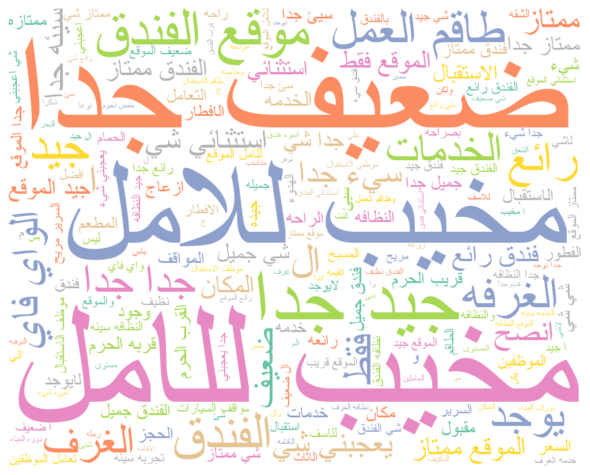

In [ ]:
# wordcloud = WordCloud(width = 1000, height = 800,background_color ='white',
#                       font_path = '/content/gdrive/MyDrive/Arial.ttf',
#                  min_font_size = 15,colormap='Set2').generate(data)#,font_path = 'arial.ttf'
  
# # # # plot the WordCloud image                       
# plt.figure(figsize = (8, 8), facecolor = None)
# plt.imshow(wordcloud,interpolation="bilinear")
# #plt.imshow(wordcloud, )

# plt.axis("off")

# plt.tight_layout(pad = 0)
  
# plt.show()


#Sentiment Analysis

In [ ]:
# to use this
X =df_u['text14']
y = df_u['polarity']
vect = CountVectorizer( ngram_range = (1,1), max_df = .80, min_df = 4)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size= 0.2)
#Using training data to transform text into counts of features for each message
vect.fit(X_train)
X_train_dtm = vect.transform(X_train) 
X_test_dtm = vect.transform(X_test)


In [ ]:
print(X_train_dtm.shape)
print(X_test_dtm.shape)
print(vect.transform(df_f['text14']).shape )

(12457, 19702)
(3115, 19702)


LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
#train_matrix

In [ ]:
lr.fit(X_train_dtm,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
predictions = lr.predict(X_test_dtm)

In [2]:
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

In [3]:
sns.heatmap(confusion_matrix(predictions,y_test), square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

MultinomialNB Classifier

In [4]:
NB = MultinomialNB()
NB.fit(X_train_dtm,y_train)
y_pred = NB.predict(X_test_dtm)
print('\nNaive Bayes')
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred)*100,'%',sep='')
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred), sep = '\n')


In [5]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred), square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

To test with new data

In [ ]:
x_test1=vect.transform(df_f['text14'])

In [ ]:
y_pred1 = NB.predict(x_test1)
print('\nNaive Bayes')
print(y_pred1)
# print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred)*100,'%',sep='')
# print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred), sep = '\n')



Naive Bayes
[ 1  1  1 ... -1  1 -1]


In [ ]:
df_f['text14']

1                                                                                                                                                                                                                                                                                                                         ممتاز النظافه والطاقم متعاون
2                                                                                                                                                                                                                                                                                                        استثنائي سهوله انهاء المعامله الاستقبال لاشيئ
3                                                                                                                                                                                                                                                                                      استثنائي انصح باختيار الاسويت بالاخ

In [ ]:
y_pred1

array([ 1,  1,  1, ..., -1,  1, -1])

Text Classification

In [ ]:
#to remove hamzah and tashkeel
stops = set(stopwords.words("arabic"))
stop_word_comp = {"،","آض","آمينَ","آه"
                  ,"آهاً","آي","أ","أب","أجل","أجمع","أخ","أخذ","أصبح","أضحى","أقبل","أقل","أكثر","ألا","أم","أما","أمامك","أمامكَ","أمسى","أمّا"
                  ,"أن","أنا","أنت","أنتم","أنتما","أنتن","أنتِ","أنشأ","أنّى","أو","أوشك","أولئك","أولئكم","أولاء","أولالك","أوّهْ","أي","أيا","أين","أينما"
                  ,"أيّ","أَنَّ","أََيُّ","أُفٍّ","إذ","إذا","إذاً","إذما","إذن","إلى","إليكم","إليكما","إليكنّ","إليكَ","إلَيْكَ","إلّا","إمّا","إن","إنّما","إي","إياك"
                  ,"إياكم","إياكما","إياكن","إيانا","إياه","إياها","إياهم","إياهما","إياهن","إياي","إيهٍ","إِنَّ","ا","ابتدأ","اثر","اجل","احد","اخرى","اخلولق"
                  ,"اذا","اربعة","ارتدّ","استحال","اطار","اعادة","اعلنت","اف","اكثر","اكد","الألاء","الألى","الا","الاخيرة","الان","الاول","الاولى","التى"
                  ,"التي","الثاني","الثانية","الذاتي","الذى","الذي","الذين","السابق","الف","اللائي","اللاتي","اللتان","اللتيا","اللتين","اللذان","اللذين","اللواتي"
                  ,"الماضي","المقبل","الوقت","الى","اليوم","اما","امام","امس","ان","انبرى","انقلب","انه","انها","او","اول","اي","ايار","ايام","ايضا"
                  ,"ب","بات","باسم","بان","بخٍ","برس","بسبب","بسّ","بشكل","بضع","بطآن","بعد","بعض","بك","بكم","بكما","بكن","بل","بلى"
                  ,"بما","بماذا","بمن","بن","بنا","به","بها","بي","بيد","بين","بَسْ","بَلْهَ","بِئْسَ","تانِ","تانِك","تبدّل","تجاه","تحوّل","تلقاء","تلك"
                  ,"تلكم","تلكما","تم","تينك","تَيْنِ","تِه","تِي","ثلاثة","ثم","ثمّ","ثمّة","ثُمَّ","جعل","جلل","جميع","جير","حار","حاشا","حاليا","حاي"
                  ,"حتى","حرى","حسب","حم","حوالى","حول","حيث","حيثما","حين","حيَّ","حَبَّذَا","حَتَّى","حَذارِ","خلا","خلال","دون","دونك","ذا"
                  ,"ذات","ذاك","ذانك","ذانِ","ذلك","ذلكم","ذلكما","ذلكن","ذو","ذوا","ذواتا","ذواتي","ذيت","ذينك","ذَيْنِ","ذِه","ذِي","راح","رجع"
                  ,"رويدك","ريث","رُبَّ","زيارة","سبحان","سرعان","سنة","سنوات","سوف","سوى","سَاءَ","سَاءَمَا","شبه","شخصا","شرع","شَتَّانَ"
                  ,"صار","صباح","صفر","صهٍ","صهْ","ضد","ضمن","طاق","طالما","طفق","طَق","ظلّ","عاد","عام","عاما","عامة","عدا"
                  ,"عدة","عدد","عدم","عسى","عشر","عشرة","علق","على","عليك","عليه","عليها","علًّ","عن","عند","عندما","عوض","عين"
                  ,"عَدَسْ","عَمَّا","غدا","غير","ـ","ف","فان","فلان","فو","فى","في","فيم","فيما","فيه","فيها","قال","قام","قبل","قد"
                  ,"قطّ","قلما","قوة","كأنّما","كأين","كأيّ","كأيّن","كاد","كان","كانت","كذا","كذلك","كرب","كل","كلا","كلاهما","كلتا"
                  ,"كلم","كليكما","كليهما","كلّما","كلَّا","كم","كما","كي","كيت","كيف","كيفما","كَأَنَّ","كِخ","لئن","لا","لات","لاسيما"
                  ,"لدن","لدى","لعمر","لقاء","لك","لكم","لكما","لكن","لكنَّما","لكي","لكيلا","للامم","لم","لما","لمّا","لن","لنا","له"
                  ,"لها","لو","لوكالة","لولا","لوما","لي","لَسْتَ","لَسْتُ","لَسْتُم","لَسْتُمَا","لَسْتُنَّ","لَسْتِ","لَسْنَ","لَعَلَّ","لَكِنَّ","لَيْتَ","لَيْسَ"
                  ,"لَيْسَا","لَيْسَتَا","لَيْسَتْ","لَيْسُوا","لَِسْنَا","ما","ماانفك","مابرح","مادام","ماذا","مازال","مافتئ","مايو","متى","مثل","مذ"
                  ,"مساء","مع","معاذ","مقابل","مكانكم","مكانكما","مكانكنّ","مكانَك","مليار","مليون","مما","ممن","من","منذ","منها","مه"
                  ,"مهما","مَنْ","مِن","نحن","نحو","نعم","نفس","نفسه","نهاية","نَخْ","نِعِمّا","نِعْمَ","ها","هاؤم","هاكَ","هاهنا","هبّ"
                  ,"هذا","هذه","هكذا","هل","هلمَّ","هلّا","هم","هما","هن","هنا","هناك","هنالك","هو","هي","هيا","هيت","هيّا"
                  ,"هَؤلاء","هَاتانِ","هَاتَيْنِ","هَاتِه","هَاتِي","هَجْ","هَذا","هَذانِ","هَذَيْنِ","هَذِه","هَذِي","هَيْهَاتَ","و","و6","وا","واحد"
                  ,"واضاف","واضافت","واكد","وان","واهاً","واوضح","وراءَك","وفي","وقال","وقالت","وقد","وقف","وكان","وكانت"
                  ,"ولا","ولم","ومن","مَن","وهو","وهي","ويكأنّ","وَيْ","وُشْكَانََ","يكون","يمكن","يوم","ّأيّان","اذن","ايش","دي","مش",
                  "عندي","انك","ايه","مره","لكل","الآن","لان","انا","إنك","لأن","مرة","إيه","فيه","اللي" ,
                  "ده","لذلك","عبر","عشان","حد","مثلا","مثلاً","مو","زي","وكذل","ال","وال","الت","ان","دة","عشان","حد","مُش","دَه",'زي','إيه','ليه','أل',
                  'إنه','إنّه','انّه','آل','و التي','انت','إنت','أنتِ','ليش','لأنه','لانه','إيش','مثل','جدا','جداً',
                  'لحد','وغيرها','و غيرها','دية','ودة','كدي','فقط','احد','أحد','وت','لكن','مره','فقط','جد','جيد','جيده','لكن','ولكن','ولكنه','ليس','باس','انا','رائع','رائعه',
                  'لقد','كنت','علي','افضل','للغايه','يكن','شيء','سيء','سىء','ممتاز','جد','ممتازه','سيئه','فقد','جيدا','شكرا'}

In [ ]:
lst = [' ' + x + ' ' for x in stop_word_comp]
df_u['text15']=df_u['text14'].apply(lambda x: ' '.join([word for word in x.split() if word not in stops and word not in lst ]))
df_u['text15'] = df_u['text15'].str.lower()
pat = '|'.join(r"\b{}\b".format(x) for x in lst)
df_u['text15'] =df_u['text15'].str.replace(pat, ' ')
df_u['text15'].to_frame()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

The default value of regex will change from True to False in a future version.



,text15
0,المكان يمكنك مراجعه الذات والتفكر كوكروبيت غانا ثمه الكثير زياره غانا وعلى الرغم الفقر تلاحظه طريقك بيغ ميلي باكيارد وجدت الناس غانا يملكون ثراء القلب رغم العوز بيغ ميلي باكيارد مكان يمكنني مراجعه الذات والتفكر التقيت اشخاصا كانوا يعملون مبادرات مختلفه بيغ ميلي مكان يمكننا تبادل الملاحظات والآراء بيغ ميلي مليء بالسلام وهادئ الطعام جدا الطهاه ممتازون وبالاضافه بد الاشاره العمال يكلون ويحرصون سعاده نزلائهم يجعلون المكان مضيافا خيبه امل واحده كبيره رغم الفنون والاشغال اليدويه شراؤها الموقع الاسعار غاليه مؤخرا ازالت السلطات كوكروبيت محلات التجار الواقعه خارج شاطئ بيغ ميلي منتجات التجار ارخص يزال محل تجاري متجر مايسترو للفن الافريقي كوكروبيت يعرض الفنون والاشغال اليدويه الفريده والملابس واللوحات اشتريت لوحات مذهله لايمكنك تجدها بيغ ميلي تزور بيغ ميلي فضلك خذ لحظه للذهاب الشاطئ وعلى يمينك ستجد متجر مايسترو للفن الافريقي المذهل تنخدع باسعار التجار بيغ ميلي باكيارد استمتع بالموسيقى والناس الرجاء تقضي وقتا ممتعا
1,موقع وحديقه ويستحق نجمه اضافيه الرغم الغرف فاخره فهي نظيفه وتعمل مثالي بالتاكيد التصرفات الفرديه والجماعيه تكييف هواء كبير وجيد ونوافذ مزدوجه شاشات منطقه الحديقه تحتوى مطاعم بالاضافه بار رياضي تبلغ تكلفه الانترنت اللاسلكي للساعه يوجد خصم الفترات الاطول اضطررت اغلاق حاسوبي رخيص يبدو العديد الزوار الاجانب امريكي لليله بوفيه افطار بمستوى نجمه واحده اقامه بكثير اعتقدت سنعود بالتاكيد شملت الاقامات السابقه فندق الافريقيه ريجنت الدخول بالمطار غرب فندق خيارريجينت افريكان وفندق ايربيورت ويست خيار قوي لتلك المنطقه المدينه حركه المرور اكرا مصابه بالشلل لذا قم بعقد اجتماعاتك فندق بالوما معروف جيدا
2,اسوا فندق اقمت الاطلاق يستغرق تسجيل الوصول حوالي دقيقه باهظ الثمن غرف قديمه وقذره سجاده قذره المجمل تجربه للغايه الفندق سيكون آسيا نجمه واحده ويمكن اذهب امريكي السعر فندق نوفوتيل حوالي امريكي
3,بدون روح كانه فندق ثلاثه نجوم بدون اداره احترافيه الفندق يبدو كمركب ضائع البحر الغرف موزعه بطريقه عشوائيه والافطار نقانق بارده سخيفه ونفس السلطه القديمه مكيف الهواء يثير الضوضاء الغرفه المستحيل ايقافه مركز صحي رائع
4,فندق جميل سوء الاداره والخدمات الخارج بدا مبشرا خيبه الامل بدات وقت الغداء جوده الطعام سيئه والحساء مزريا والفواكه جودتها البكيخ متعفنا اشتكى زملائي وجود مناشف غرفهم حوالي الساعه والبعض تكن اسرتهم مرتبه الساعه تناولنا عشاء مكسيكيا ومره قائمه الطعام مزريه اقيم ابدا الاقل اتحدث نفسي
...,...
15567,قريب شي جميل وهادي وكل شي حولك حتي المواقف هادي يصلح لزوجين لشهر العسل ابسالا مدينه حالمه طبيعه وهدوء انصح بالزياره والتمتع بجو المدينه تاريخ الفندق موقعه ممتاز بقرب محطه القطار ورحابه الموظفين راقيه خدمه سريعه نظافته وتوفر
15568,فندق وممتاز نزلت بتاريخ الفندق وبقيت بحدود وشهادت الراحه والخدمه شكرا قدمتموه وكم اتمنى اعود وانزل الفندق يقع قلب المدينه وكل شي قريب منك
15569,جيد الفندق ميزته يقع قرب مركز شرطه العاصمه وعموما اوغندا امان وليس الخطوره السفر يتميز الفندق رخيص مستوى نظافته وهذا اهم البلاد المطعم الفندق بالنسبه باقي المطاعم المدينه متوسط بالمقارنه بفنادق مدن فهو ضعيف خدمه مساج الغرف تاتيك المدلكه جميله سمراء تقوم بتدليك جسمك بالطريقه تعجبك
15570,احقر مكان وجه الارض انصح يقومون بتصفح الفنادق الانترنت بالتروى الاختيار فهذا المكان احقر وجدت المغرب فهو بعيد مراكش وسط الزراعات والادغال ولاتوجد خدمه بالداخل يوجد انترنت والتواليتات الخاصه بالغرف تعمل سليم ومسدوده والافطار عباره بيضه مسلوقه وقطعه الجبن قليل المربى والزبد البلدى والخبز الغداء والعشاء فالله بالسر عليم فلقد ندمنا فعلنا وايضا وجدنا التواليت مسدود وعندما طلبنا تغييره قالو بانهم قامو بدفع مبلغ اصلاحه فهل ملتزمون بتصليح التواليت ناهيك المكان الموجود الفندق فندق وانما قبر وسط الزراعات حياه بشر وهذا للامانه احببت انصح غيرى


LatentDirichletAllocation

In [ ]:
# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=100, token_pattern='\w+|\$[\d\.]+|\S+')
# apply transformation
tf = vectorizer.fit_transform(df_u['text15']) #.toarray()
# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()
tf.shape # --> (200000, 2296)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



(15572, 1541)

In [ ]:
number_of_topics = 10
model = LatentDirichletAllocation(n_components=number_of_topics, random_state=45) # random state for reproducibility
# Fit data to model
model.fit(tf)

LatentDirichletAllocation(random_state=45)

In [6]:
for index, topic in enumerate(model.components_):
    print(f'Top 5 words for Topic #{index}')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

In [7]:
def show_topics(vectorizer=vectorizer, lda_model=model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=model, n_words=10)

df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords.T

nmf

In [8]:
n_features = 104
n_components = 10 # number of topics
n_top_words = 20

# ignore terms that have a document frequency strictly higher than 95%, 
# ignore terms that have a document frequency strictly lower than 2
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features)
tfidf = tfidf_vectorizer.fit_transform(df_u['text15'].values.astype(str))

# alpha=0 means no regularization, l1_ratio=.5, the penalty is a combination of L1 and L2
nmf = NMF(n_components=n_components, random_state=1, alpha=.1, l1_ratio=.5).fit(tfidf)
nmf_output = nmf.fit_transform(tfidf)

def show_topics(vectorizer=tfidf_vectorizer, lda_model=nmf, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=tfidf_vectorizer, lda_model=nmf, n_words=10)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]

#Topics_theme = ['Word start from ph', 'People/Friend/Relationship', 'Life/Experience/Love/Purpose', 'Money/Internet/Business', 
#                 'Weekend/Parent/Child', 'Leisure time', 'Language/technique/software', 'Relationship/Girl/Boy', 
#                 'Business relate to India, China or Pakistan', 'Friend/Love/Relationship', 'Difference and similarity/Language/Engineering', 
#                 'Culture, travel and visa requirements in several countries', 'Tips on working as software engineering', 'Book/Movie/Class/History/Physics/Chemistry/Science', 
#                 'Software engineer job opportunitis in Canada', 'Love/Life/Relationship', 'World/War/Language/History', 'Day/Hour/Week/Month/Sex/Place', 'School/Student/College/University', 
#                 'Question/Answer/Quora/Interview']
# df_topic_keywords['topic_theme'] = Topics_theme
#df_topic_keywords.set_index('topic_theme', inplace=True)
df_topic_keywords.T

In [ ]:
H = pd.DataFrame(doc_topic.round(5),
             columns = ["سيرة الذاتية ومذكرات","مراجع وابحاث","فنون","قانون ","فلسفة","سياسة","اجتماعية","روايات وقصص","مال واعمال","الاسرة والطفل","تكنلوجيا والانترنت","سيرة النبوية","دينية","تاريخية","ادب"]
)
H

In [ ]:
from sklearn.metrics import silhouette_score
km = KMeans(n_clusters = 17)
km.fit(H)
silhouette_score(H, km.labels_)

In [ ]:
cluster=km.predict(H)

In [ ]:
df_scaled=pd.DataFrame(km.cluster_centers_,columns=H.columns)
H["cluster"]=cluster